In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
import scipy.stats as st
from scipy.stats import f_oneway
import mlflow

In [2]:
from pycaret.datasets import get_data
df = get_data('blood')

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


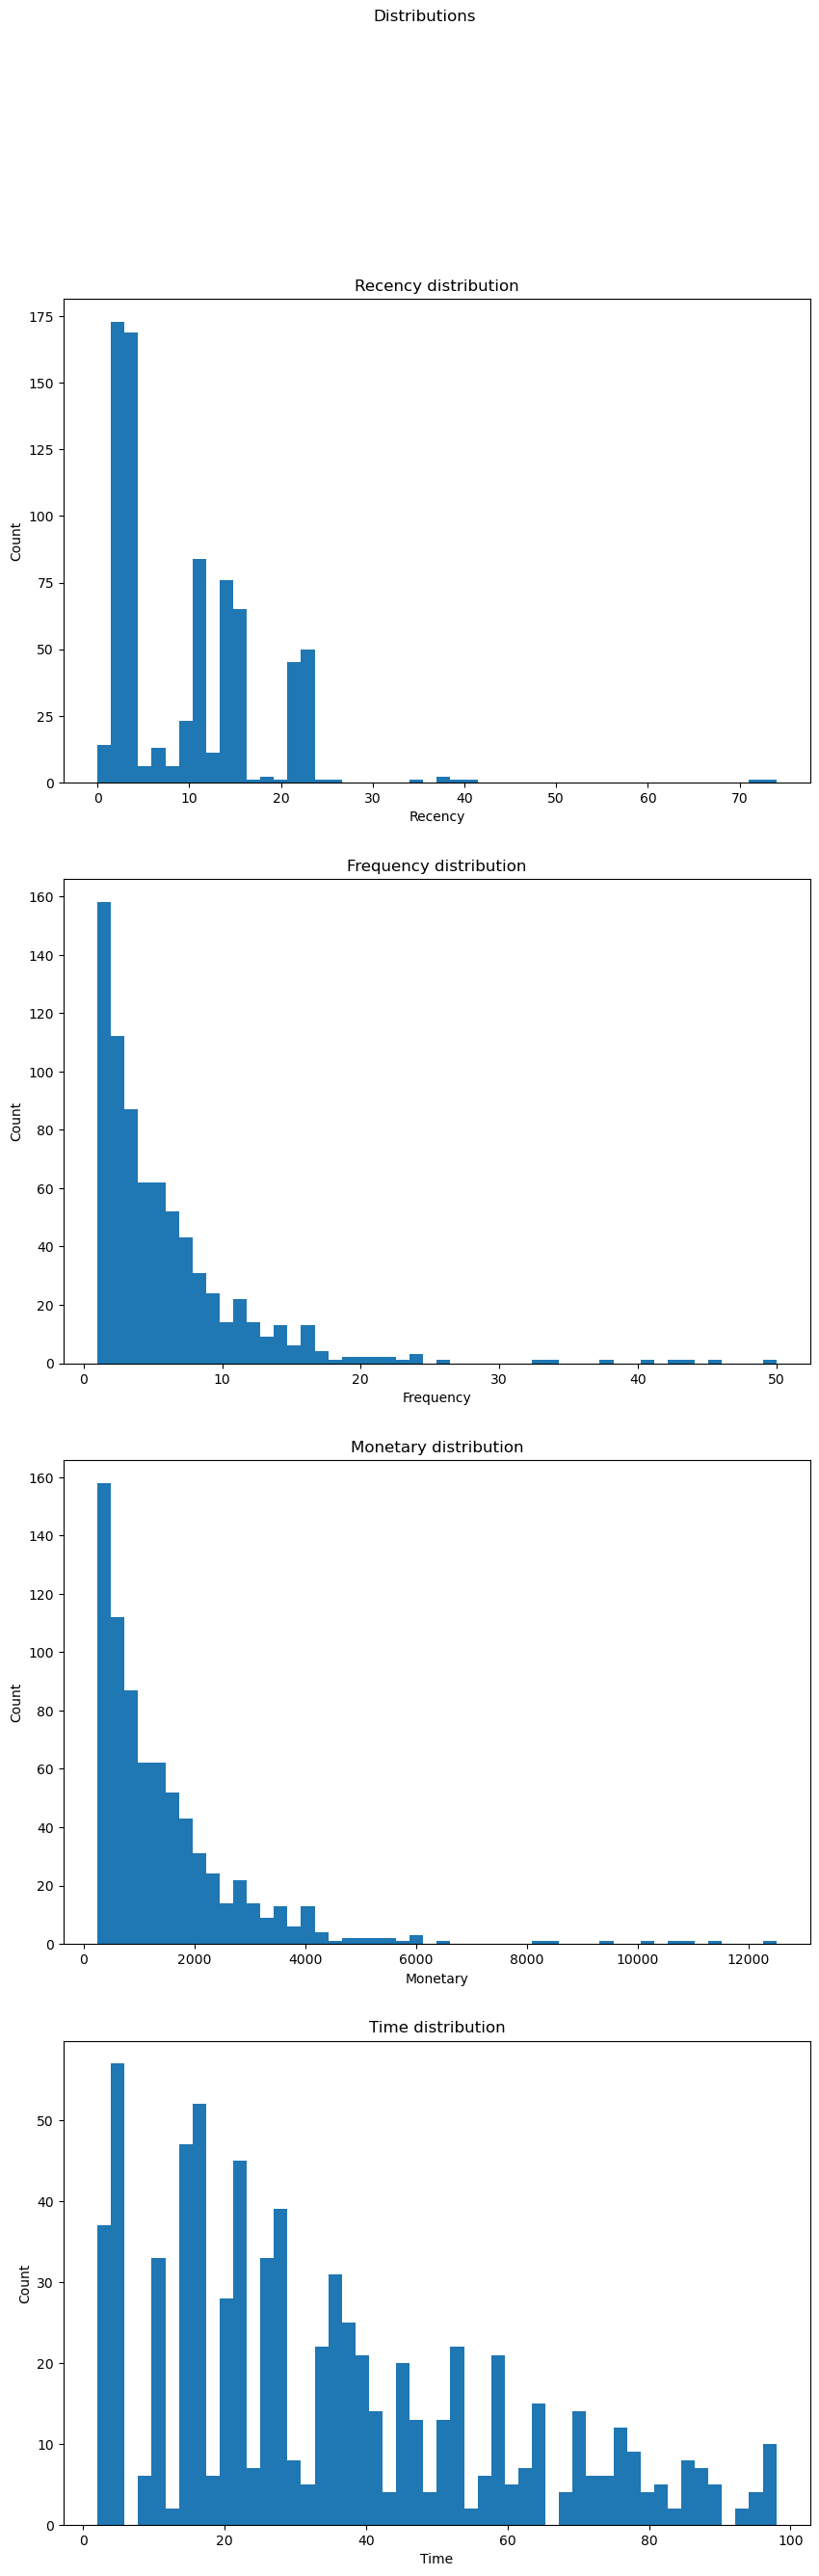

In [3]:
fig, axs = plt.subplots(len(df.columns) - 1, figsize=(10, 30))

fig.suptitle('Distributions')

i = 0
for column in df.columns:
    if column == 'Class':
        continue
    else:
            
        axs[i].hist(
            df[column],
            bins = 50
        )      

        axs[i].set_title(column + ' ' + 'distribution')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Count') 
        i = i + 1

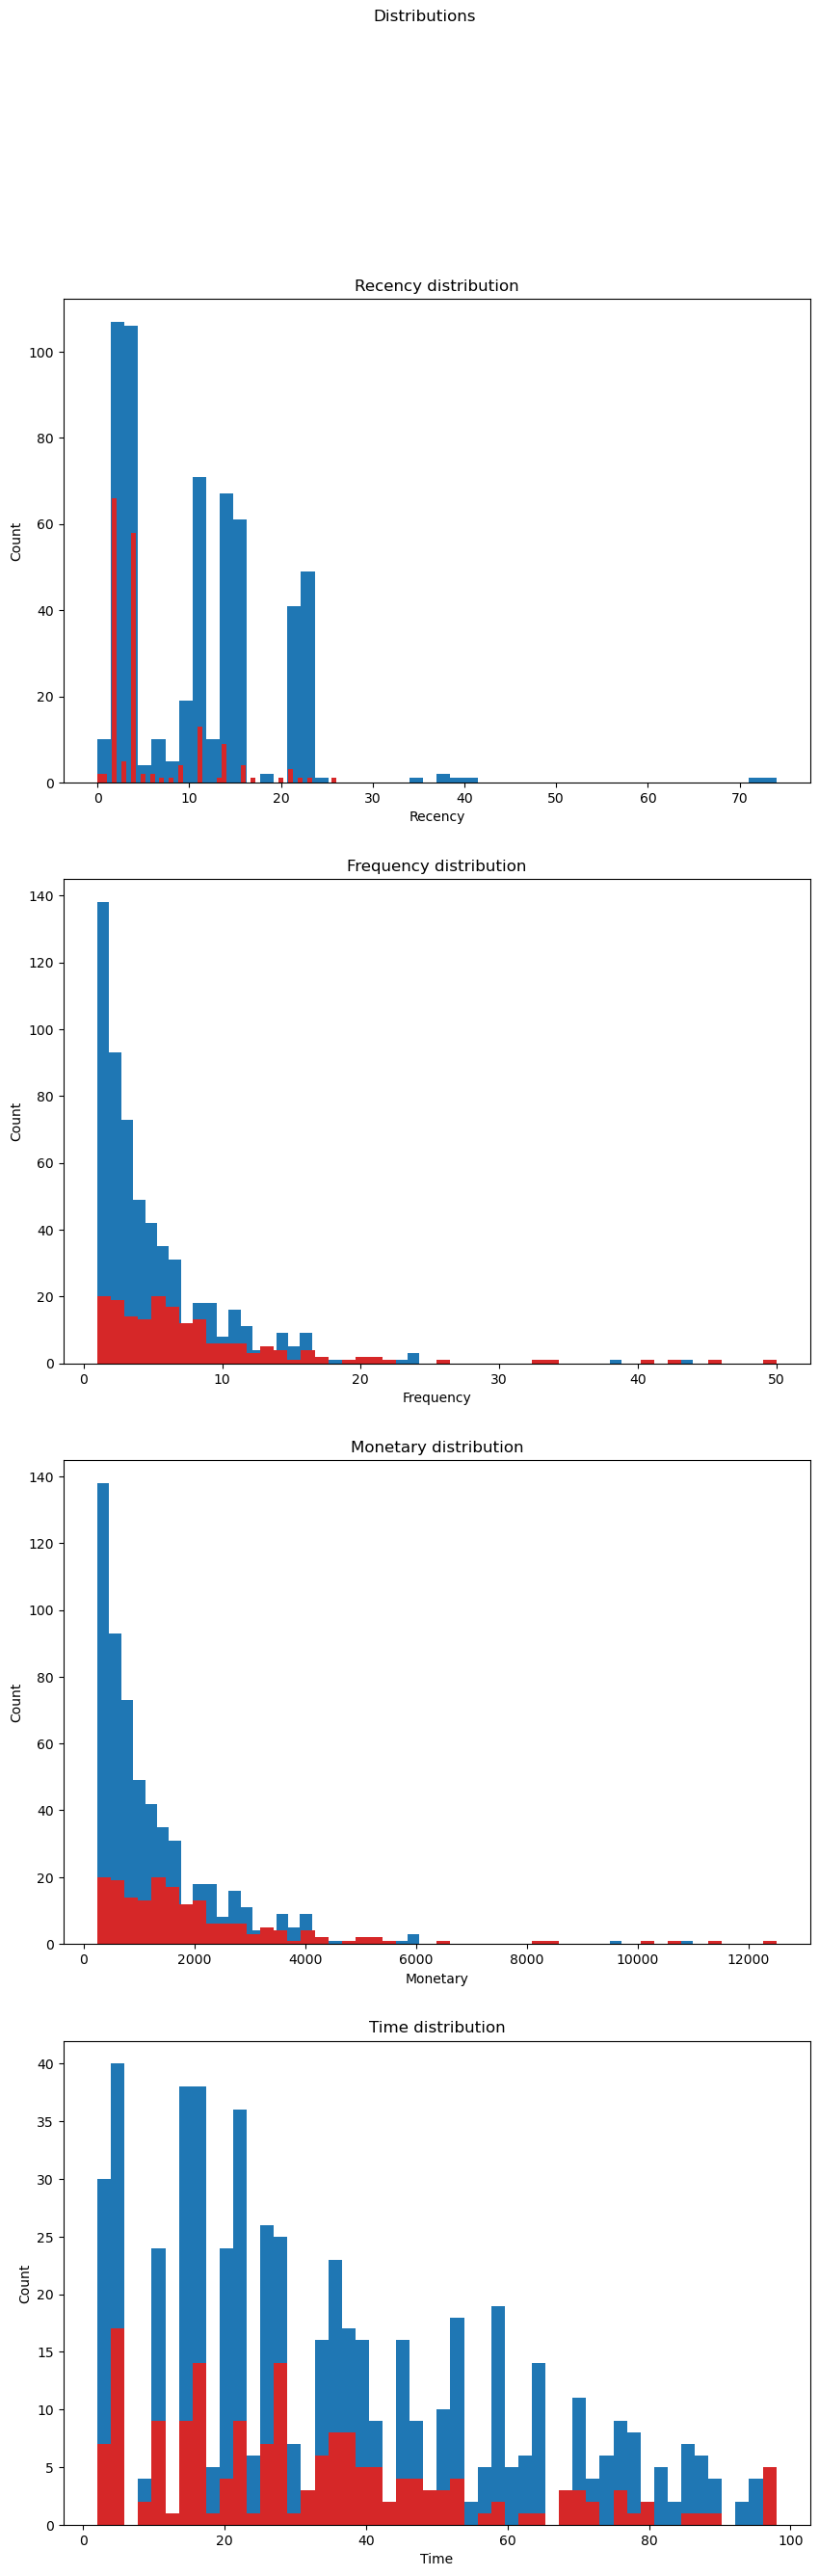

In [4]:
fig, axs = plt.subplots(len(df.columns) - 1, figsize=(10, 30))

fig.suptitle('Distributions')

i = 0
for column in df.columns:
    if column == 'Class':
        continue
    else:
            
        axs[i].hist(
            df[column].loc[df['Class'] == 0],
            bins = 50
        )
        
        axs[i].hist(
            df[column].loc[df['Class'] == 1],
            bins = 50,
            color = 'tab:red'
        )

        axs[i].set_title(column + ' ' + 'distribution')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Count') 
        i = i + 1

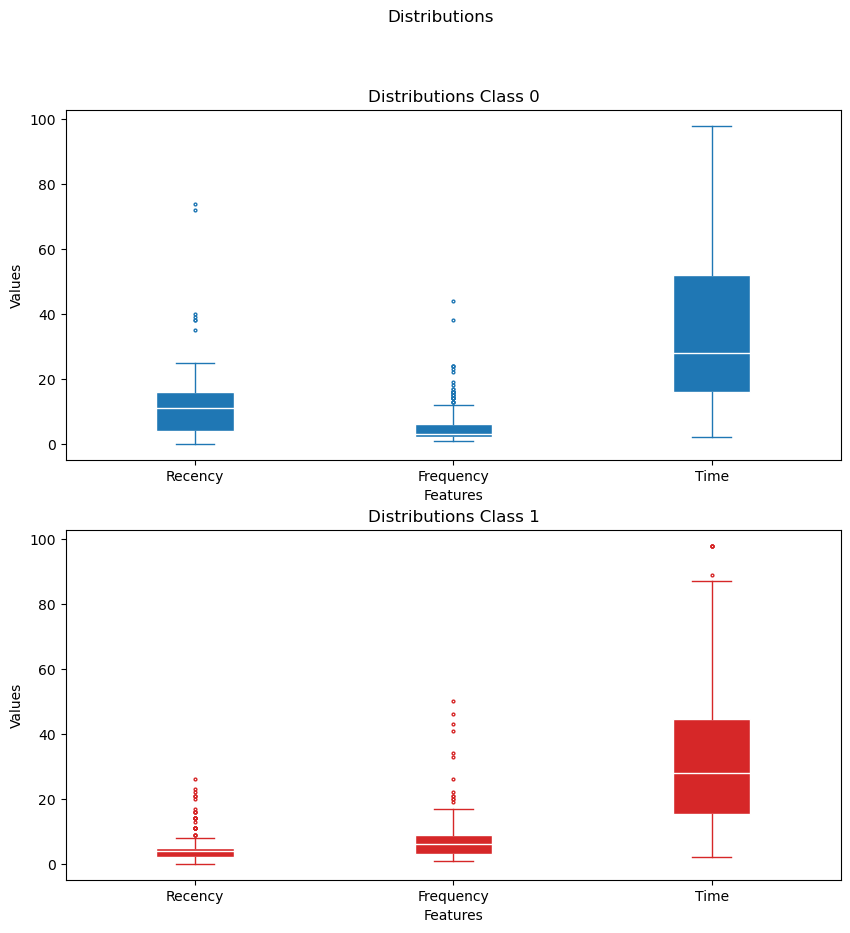

In [5]:
fig, axs = plt.subplots(2, figsize=(10, 10))
                        
fig.suptitle('Distributions')

axs[0].boxplot(
    df.loc[df['Class'] == 0].drop(columns = ['Class', 'Monetary']),
    labels = df.columns.drop(['Class', 'Monetary']),
    showmeans = False,
    patch_artist = 'tab:blue',
    medianprops = {'color': 'white'},
    boxprops = {'color' : 'white'},
    whiskerprops = {'color' : 'tab:blue'},
    capprops = {'color' : 'tab:blue'},
    flierprops = {
        'markerfacecolor' : 'none',
        'markersize' : '2',
        'markeredgecolor' : 'tab:blue'
        
    }
)
axs[0].set_title('Distributions Class 0')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Values')

axs[1].boxplot(
    df.loc[df['Class'] == 1].drop(columns = ['Class', 'Monetary']),
    labels = df.columns.drop(['Class', 'Monetary']),
    showmeans = False,
    patch_artist = 'tab:red',
    medianprops = {'color': 'white'},
    boxprops = {'color' : 'white', 'facecolor' :'tab:red'},
    whiskerprops = {'color' : 'tab:red'},
    capprops = {'color' : 'tab:red'},
    flierprops = {
        'markerfacecolor' : 'none',
        'markersize' : '2',
        'markeredgecolor' : 'tab:red'
        
    }
          )
axs[1].set_title('Distributions Class 1')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Values')

plt.show()

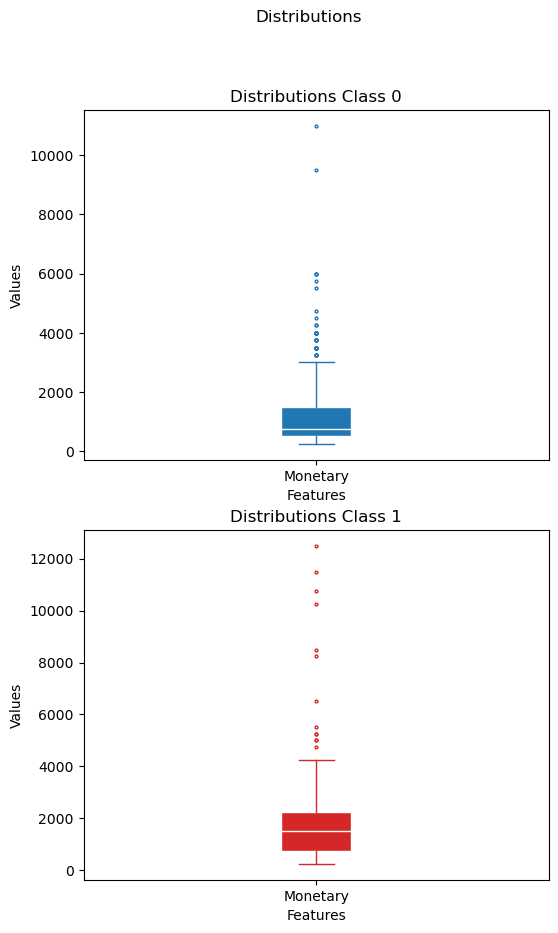

In [6]:
#Monetary
fig, axs = plt.subplots(2, figsize=(6, 10))
                        
fig.suptitle('Distributions')

axs[0].boxplot(
    df['Monetary'].loc[df['Class'] == 0],
    labels = ['Monetary'],
    showmeans = False,
    patch_artist = 'tab:blue',
    medianprops = {'color': 'white'},
    boxprops = {'color' : 'white'},
    whiskerprops = {'color' : 'tab:blue'},
    capprops = {'color' : 'tab:blue'},
    flierprops = {
        'markerfacecolor' : 'none',
        'markersize' : '2',
        'markeredgecolor' : 'tab:blue'
        
    }
)
axs[0].set_title('Distributions Class 0')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Values')

axs[1].boxplot(
    df['Monetary'].loc[df['Class'] == 1],
    labels = ['Monetary'],
    showmeans = False,
    patch_artist = 'tab:red',
    medianprops = {'color': 'white'},
    boxprops = {'color' : 'white', 'facecolor' :'tab:red'},
    whiskerprops = {'color' : 'tab:red'},
    capprops = {'color' : 'tab:red'},
    flierprops = {
        'markerfacecolor' : 'none',
        'markersize' : '2',
        'markeredgecolor' : 'tab:red'
        
    }
          )
axs[1].set_title('Distributions Class 1')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Values')

plt.show()

In [7]:
df_total_agg = pd.DataFrame()
for col in df.columns:
    if col not in ['Class']:
        df_total_agg = pd.concat([df_total_agg, df.groupby('Class').agg({col : 'mean'}).rename(columns = {col : col + '_mean'})], axis = 1)
        df_total_agg = pd.concat([df_total_agg, df.groupby('Class').agg({col : 'std'}).rename(columns = {col : col + '_std'})], axis = 1)
        df_total_agg = pd.concat([df_total_agg, df.groupby('Class').agg({col : 'count'}).rename(columns = {col : col + '_count'})], axis = 1)        
        

In [8]:
df_total_agg.reset_index(inplace = True)

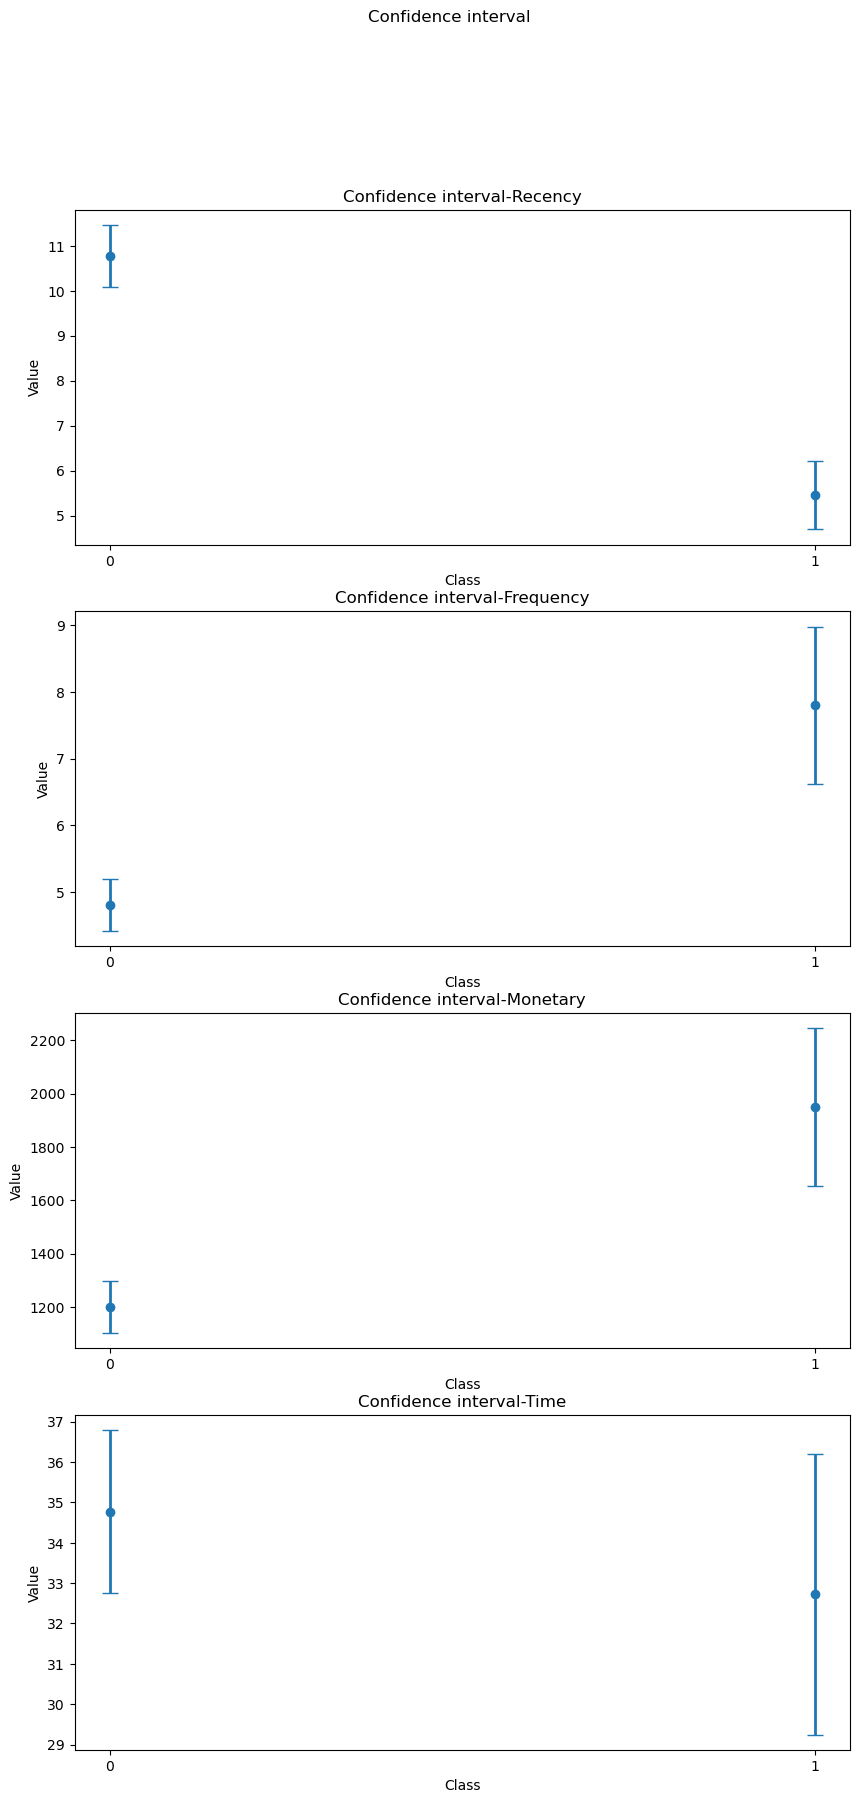

In [9]:
fig, axs = plt.subplots(len(df.columns) - 1, figsize = (10, 20))

fig.suptitle('Confidence interval')

i = 0

for col in df.columns:
    if col in ['Class']:
        continue
    else:    
        axs[i].errorbar(x = df_total_agg['Class'].astype('int').astype('str'),
                y = df_total_agg[col +'_mean'], 
                yerr = 1.96 * df_total_agg[col + '_std'] / np.sqrt(df_total_agg[col + '_count']), 
                fmt = 'o', 
                linewidth = 2, 
                capsize = 6)
        
        axs[i].set_title('Confidence interval' + '-' + col)
        axs[i].set_xlabel('Class')
        axs[i].set_ylabel('Value') 

        i = i + 1


In [10]:
for col in df.columns:
    if col != 'Class':
        print(str(col) + ':', 
              'statistic -', f_oneway(df[col].loc[df['Class'] == 0], df[col].loc[df['Class'] == 1]).statistic, 
              'p_val - ',round(f_oneway(df[col].loc[df['Class'] == 0], df[col].loc[df['Class'] == 1]).pvalue, 5))

Recency: statistic - 63.397326870190994 p_val -  0.0
Frequency: statistic - 37.449334038640814 p_val -  0.0
Monetary: statistic - 37.44933403864079 p_val -  0.0
Time: statistic - 0.960246211395696 p_val -  0.32744


Text(120.72222222222221, 0.5, 'Features')

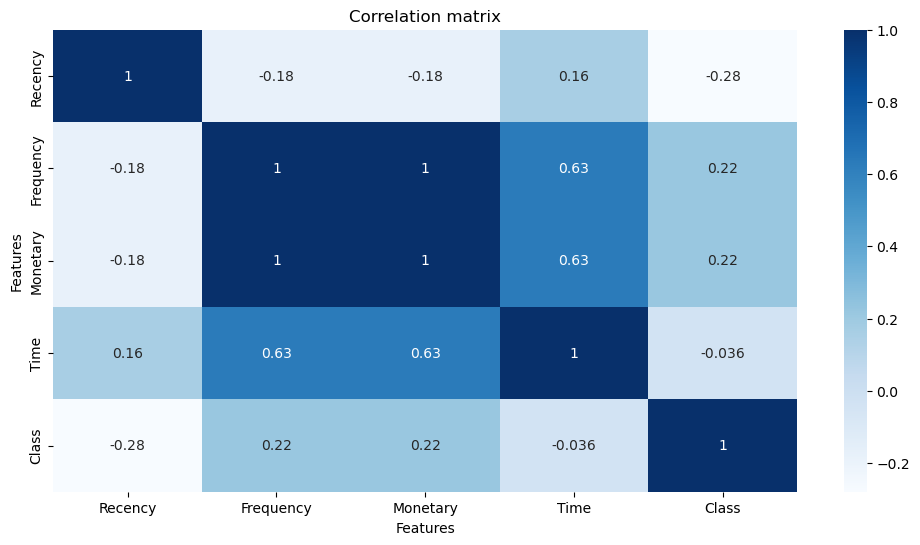

In [11]:
plt.figure(figsize = (12,6))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Correlation matrix')
plt.xlabel('Features')
plt.ylabel('Features')

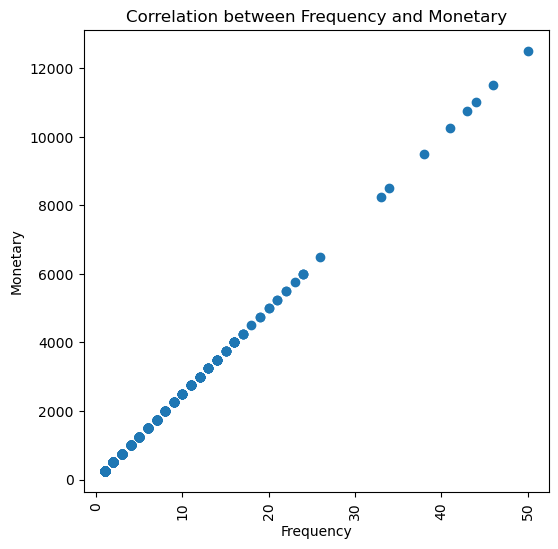

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(
    df.Frequency,
    df.Monetary
          )


#ax.legend()
plt.xticks(rotation = 'vertical')
plt.title('Correlation between Frequency and Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [13]:
df_train = df.drop(columns = ['Monetary'])

In [14]:
mlflow.autolog()

2024/02/28 21:27:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/02/28 21:27:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/02/28 21:27:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [15]:
from pycaret.classification import *
s = setup(df_train, 
          target = 'Class', 
          session_id = 47, 
          train_size = 0.7, 
          fold_strategy = 'kfold', 
          fold = 5, 
          normalize = True,
          transformation = True,
          log_experiment = True,
          experiment_name = 'ex_2')

,Description,Value
0,Session id,47
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 4)"
4,Transformed data shape,"(748, 4)"
5,Transformed train set shape,"(523, 4)"
6,Transformed test set shape,"(225, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


2024/02/28 21:27:29 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [16]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7839,0.5167,0.3325,0.5843,0.4180,0.3008,0.3213,0.0260
ada,Ada Boost Classifier,0.7838,0.5550,0.4066,0.5773,0.4643,0.3379,0.3535,0.0480
ridge,Ridge Classifier,0.7743,0.0000,0.1146,0.5950,0.1836,0.1327,0.1878,0.0240
lr,Logistic Regression,0.7725,0.7342,0.2657,0.5310,0.3504,0.2360,0.2567,1.5060
svm,SVM - Linear Kernel,0.7687,0.0000,0.1721,0.4476,0.2358,0.1541,0.1831,0.0240
lda,Linear Discriminant Analysis,0.7668,0.7333,0.2293,0.5021,0.3101,0.1984,0.2206,0.0260
catboost,CatBoost Classifier,0.7666,0.6624,0.3332,0.5319,0.4009,0.2685,0.2841,0.4600
knn,K Neighbors Classifier,0.7630,0.4876,0.4044,0.5168,0.4382,0.2959,0.3087,0.9540
dummy,Dummy Classifier,0.7628,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
nb,Naive Bayes,0.7611,0.4186,0.2802,0.5004,0.3541,0.2261,0.2411,0.0280


In [17]:
print(model)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [18]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# within notebook (notice ! sign infront)
!mlflow ui
# on command line in the same folder
#mlflow ui